ID：样本编号 
date：观测数据发生的日期（年-月-日） 
hour：观测数据发生的时间点（时） 
Label：观测时间点对应的pm2.5指数（(ug/m^3) 
DEWP：露点，空气中水气含量达到饱和的气温（â„ƒ） 
TEMP：温度，观测时间点对应的温度（â„ƒ） 
PRES：压强，观测时间点对应的压强（hPa） 
Iws：累积风速，观测时间点对应的累积风速（m/s） 
Is：累计降雪，到观测时间点为止累计降雪的时长（小时） 
Ir：累计降雨，到观测时间点为止累计降雨的时长（小时） 
cbwd_NE：观测时间点对应的风向为东北风(m/s) 
cbwd_NW：观测时间点对应的风向为西北风(m/s) 
cbwd_SE：观测时间点对应的风向为东南风(m/s) 
cbwd_cv：观测时间点对应的风向为静风(m/s) 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 导入数据集分割函数
from sklearn.neighbors import KNeighborsClassifier # 导入k近邻分类器
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
def create_data(data_name):# 导入数据并作一些预处理
    dataset=pd.read_csv(data_name)
    dataset=dataset.drop(['ID'], axis=1)
    dataset = dataset.dropna () # 去除缺失值
    # 合并"date"和"hour"列为一个完整的日期时间列
    dataset['datetime'] = pd.to_datetime(dataset['date'] + ' ' + dataset['hour'].astype(str) + ':00:00')
    dataset['timestamp'] = dataset['datetime'].astype('int64') // 10**9
    
    dataset=dataset.drop(['date'], axis=1)
    dataset=dataset.drop(['hour'], axis=1)
    dataset=dataset.drop(['datetime'], axis=1)
    dataset['y']=dataset['Label']
    dataset=dataset.drop(['Label'], axis=1)
    return dataset

In [3]:
train_data=create_data("train.csv")
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values
print(train_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003) # 将数据集分为训练集和测试集

clf = KNeighborsClassifier(n_neighbors=3) # 创建一个k近邻分类器，设置k为3
clf.fit(X_train, y_train) # 用训练集来拟合分类器
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(y_pred)
correct = np.count_nonzero((clf.predict(X_test) == y_test) == True) # 计算测试集中预测正确的个数
print(correct)

       DEWP  Ir  Is     Iws    PRES  TEMP  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_cv  \
0       -16   0   0    1.79  1020.0  -4.0        0        0        1        0   
1       -15   0   0    2.68  1020.0  -4.0        0        0        1        0   
2       -11   0   0    3.57  1021.0  -5.0        0        0        1        0   
3        -7   0   1    5.36  1022.0  -5.0        0        0        1        0   
4        -7   0   2    6.25  1022.0  -5.0        0        0        1        0   
...     ...  ..  ..     ...     ...   ...      ...      ...      ...      ...   
35741   -23   0   0  231.97  1034.0  -2.0        0        1        0        0   
35742   -22   0   0  237.78  1034.0  -3.0        0        1        0        0   
35743   -22   0   0  242.70  1034.0  -3.0        0        1        0        0   
35744   -22   0   0  246.72  1034.0  -4.0        0        1        0        0   
35745   -21   0   0  249.85  1034.0  -3.0        0        1        0        0   

        timestamp      y  


<AxesSubplot:>

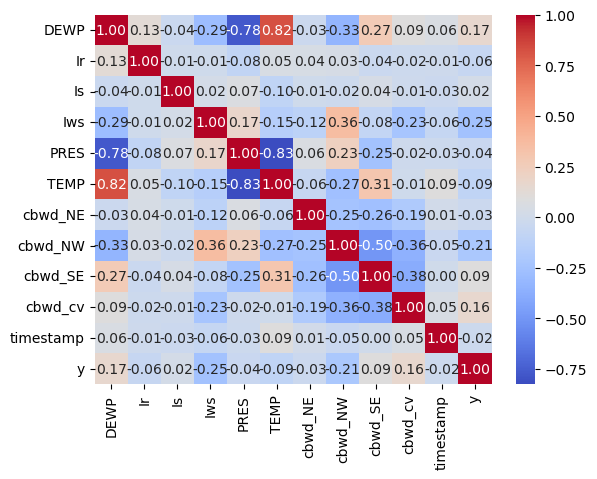

In [4]:
# 计算相关性
corr = train_data.corr()

# 绘制热图，并添加注释显示具体数值
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")